In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf


#statistical tests
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
#import yfinance as yf

# downloading bitcoin data
btcusdt_ticker = "BTC-USD"
start_date = "2020-01-01"
end_date = "2023-04-25"

df = yf.download(btcusdt_ticker, start=start_date, end=end_date)
print(df.head())


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316   
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   

                 Volume  
Date                     
2020-01-01  18565664997  
2020-01-02  20802083465  
2020-01-03  28111481032  
2020-01-04  18444271275  
2020-01-05  19725074095  


# Skewness

Skewness: 0.4478471082503529


<ipython-input-3-db873bac3999>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde=True)
<ipython-input-3-db873bac3999>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(x)[0][0]


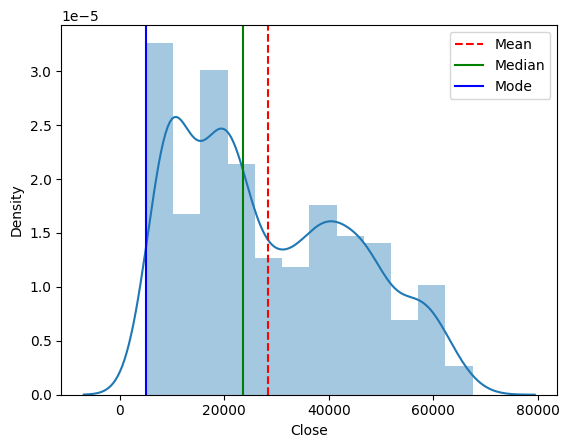

In [3]:
x = df['Close']

# Plot histogram with density plot
sns.distplot(x, kde=True)

# Calculate mean, median and mode
mean = x.mean()
median = x.median()
mode = stats.mode(x)[0][0]

# Plot mean, median and mode
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')

# Add legend
plt.legend()

# Calculate and print skewness
skewness = x.skew()
print(f'Skewness: {skewness}')

# Show plot
plt.show()

Figure 1. A histogram of Bitcoin’s closing price for the period: "2020-01-01" till "2023-04-25"

<ipython-input-4-d97356e34ff9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True)
<ipython-input-4-d97356e34ff9>:12: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(y)[0][0]


Skewness: -0.6606772739191231


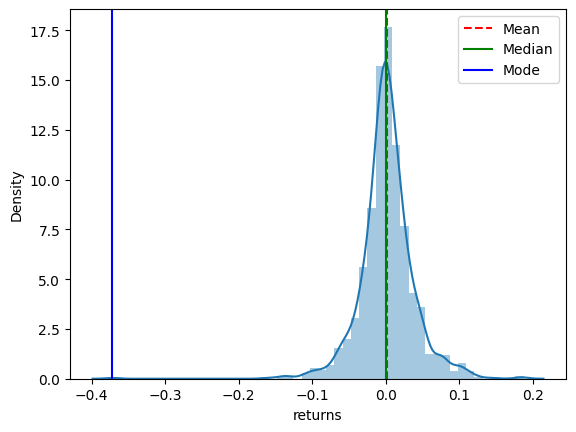

In [4]:
df['returns'] = df['Close'].pct_change()
df= df.dropna()

y = df['returns']

# Plot histogram with density plot
sns.distplot(y, kde=True)

# Calculate mean, median and mode
mean = y.mean()
median = y.median()
mode = stats.mode(y)[0][0]

# Plot mean, median and mode
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')

# Add legend
plt.legend()

# Calculate and print skewness
skewness = y.skew()
print(f'Skewness: {skewness}')

# Show plot
plt.show()

Figure 2. A histogram of Bitcoin’s returns for the period: "2020-01-01" till "2023-04-25"

<ipython-input-5-933793248f35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df['Close'].pct_change()
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-5-933793248f35>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_y, kde=True)
<ipython-input

Skewness: -1.1493914756896881


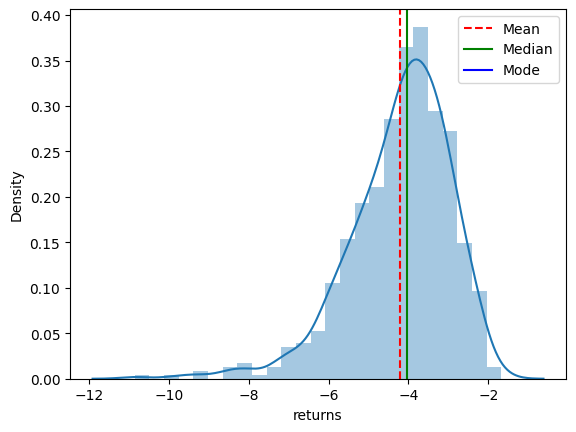

In [5]:
df['returns'] = df['Close'].pct_change()
df= df.dropna()

log_y = np.log(df['returns'])

# Plot histogram with density plot
sns.distplot(log_y, kde=True)

# Calculate mean, median and mode
mean = log_y.mean()
median = log_y.median()
mode = stats.mode(log_y)[0][0]

# Plot mean, median and mode
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.axvline(median, color='g', linestyle='-', label='Median')
plt.axvline(mode, color='b', linestyle='-', label='Mode')

# Add legend
plt.legend()

# Calculate and print skewness
skewness = log_y.skew()
print(f'Skewness: {skewness}')

# Show plot
plt.show()

Figure 3. A histogram of Bitcoin’s logged returns for the period: "2020-01-01" till "2023-04-25"

# Kurtosis/Heteroscedasticity

## Kurtosis

Kurtosis of the returns: 8.905861100728496


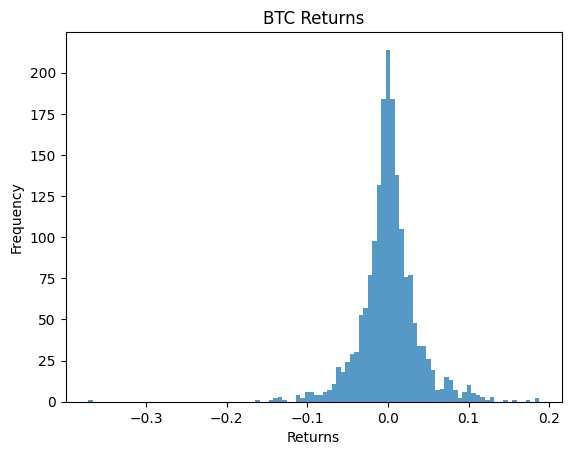

In [6]:
# Download historical data for Bitcoin
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="5y")

# Calculate daily returns
hist['Return'] = hist['Close'].pct_change()

# Compute kurtosis
kurtosis = hist['Return'].kurtosis()

print(f"Kurtosis of the returns: {kurtosis}")

# Plot the histogram of returns
plt.hist(hist['Return'].dropna(), bins=100, alpha=0.75)
plt.title('BTC Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

## Heteroscedasticity

In [7]:
# Use only Close price for each day to do the analysis

price = hist['Close']

# Log transformation to stabilize variance
log_price = np.log(price)

time = np.arange(len(price))

X = sm.add_constant(time)

model = sm.OLS(price, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     1036.
Date:                Thu, 08 Jun 2023   Prob (F-statistic):          1.88e-180
Time:                        17:57:47   Log-Likelihood:                -19946.
No. Observations:                1827   AIC:                         3.990e+04
Df Residuals:                    1825   BIC:                         3.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4287.6435    624.179      6.869      0.0

In [8]:
bp_test = het_breuschpagan(results.resid, results.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 215.59042935089354, 'LM-Test p-value': 8.284509750482356e-49, 'F-Statistic': 244.16668532438376, 'F-Test p-value': 9.387270965360339e-52}


p-value =  9.439783705076006e-50
Our data is heterosckedastic

# Sensitivity to Outliers

## Z-Score

Mean return without considering outliers: 0.0002219068093494727
Mean return after excluding outliers: 0.0005755491622430287


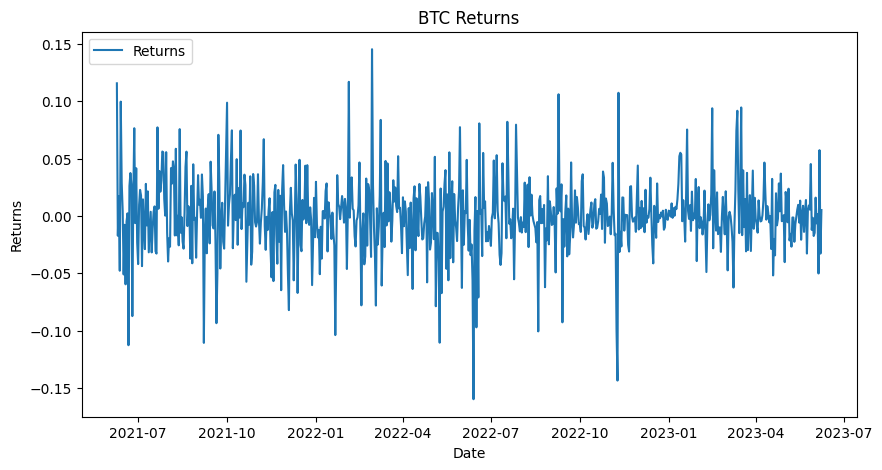

In [9]:
btc = yf.Ticker("BTC-USD")
hist = btc.history(period="2y")

# Calculate daily returns
hist['Return'] = hist['Close'].pct_change()

# Calculate the mean of returns without considering potential outliers
mean_return_without_outliers = hist['Return'].mean()

# Define a function to detect outliers using the Z-score method
def detect_outliers(data):
    outliers = []
    threshold = 3
    mean = data.mean()
    std = data.std()
    
    for i in data:
        z_score = (i - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Detect outliers in the returns data
outliers = detect_outliers(hist['Return'])

# Calculate the mean of returns after excluding outliers
mean_return_with_outliers = hist['Return'][~hist['Return'].isin(outliers)].mean()

print(f"Mean return without considering outliers: {mean_return_without_outliers}")
print(f"Mean return after excluding outliers: {mean_return_with_outliers}")

# Plotting the returns
plt.figure(figsize=(10,5))
plt.plot(hist['Return'], label='Returns')
plt.title('BTC Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(loc='upper left')
plt.show()

## Box-Plot

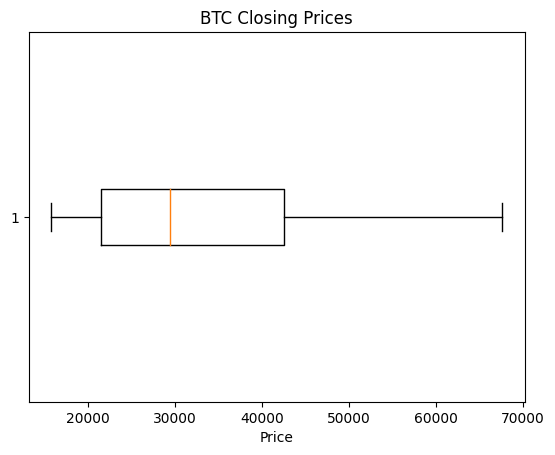

In [10]:
# Plotting the closing prices with a boxplot
plt.boxplot(hist['Close'].dropna(), vert=False)
plt.title('BTC Closing Prices')
plt.xlabel('Price')
plt.show()

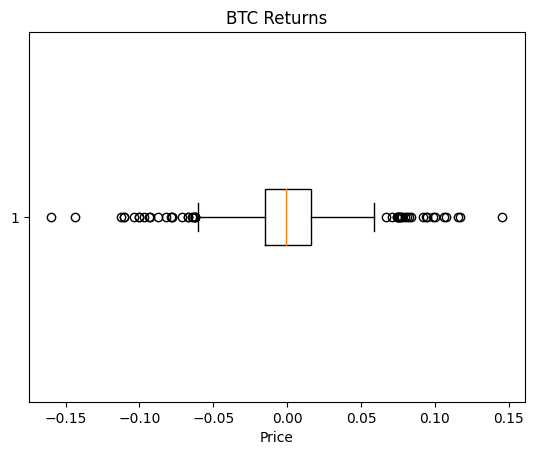

In [11]:
# Plotting the closing prices with a boxplot
plt.boxplot(hist['Return'].dropna(), vert=False)
plt.title('BTC Returns')
plt.xlabel('Price')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


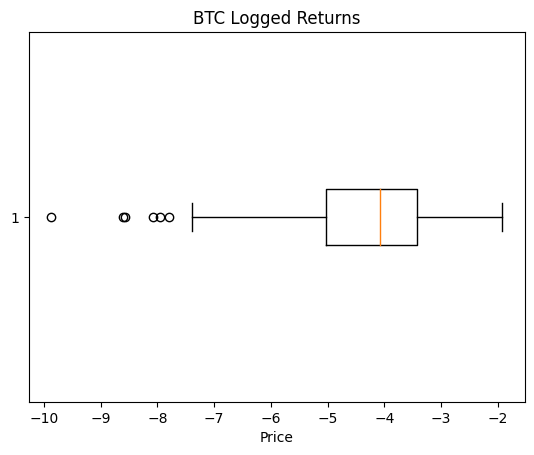

In [12]:
btc_log_returns = np.log(hist['Return'])
# Plotting the closing prices with a boxplot
plt.boxplot(btc_log_returns.dropna(), vert=False)
plt.title('BTC Logged Returns')
plt.xlabel('Price')
plt.show()